# Deep learning for NLP

本次课的主要内容：
- 简要了解pytorch，以及训练深度模型的步骤
- 使用LSTM进行语言建模
- 使用TextCNN进行文本分类

## 1. Pytorch

官网：https://pytorch.org/

- tensor
- 自动求导
- 深度学习流程
    - 加载数据
    - 建立模型
    - 选择优化器
    - 训练
    - 保存和加载模型

参考：
- https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [4]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())

1.8.0
True
1


In [5]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

print(x_data)
print(x_data.shape)
print(x_data.dtype)
print(x_data.device)

print(x_data.t())

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
torch.int64
cpu
tensor([[1, 3],
        [2, 4]])


In [6]:
x_data_cuda = x_data.cuda()

print(x_data_cuda)
print(x_data_cuda.device)

tensor([[1, 2],
        [3, 4]], device='cuda:0')
cuda:0


**一个简单的例子**: 逻辑回归

<img src='img/逻辑回归.JPG' width=500>

In [7]:
x = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0], [0], [0], [1]])

print(x)
print(y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0],
        [0],
        [0],
        [1]])


In [8]:
import torch.nn.functional as F

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

w = torch.randn(2, 1)
b = torch.randn(1)

n_iter = 20
learning_rate = 0.1

for i in range(n_iter):
    # (4,2) @ (2,1) + (1,) = (4,1)
    z = x @ w + b
    y_hat = torch.sigmoid(z)

    loss = F.binary_cross_entropy(y_hat, y.float())
    accuracy = ((y_hat > 0.5) == y).float().mean()
    print(f'Iter {i+1:2d}, loss: {loss:.4f}, accuracy: {accuracy:.2f}')

    # (2,4) @ (4, 1) = (2, 1)
    gradient_w = x.t() @ (y_hat - y) / x.size(0)
    gradient_b = (y_hat-y).mean()

    w = w - learning_rate * gradient_w
    b = b - learning_rate * gradient_b

Iter  1, loss: 0.7826, accuracy: 0.25
Iter  2, loss: 0.7686, accuracy: 0.25
Iter  3, loss: 0.7555, accuracy: 0.25
Iter  4, loss: 0.7431, accuracy: 0.25
Iter  5, loss: 0.7315, accuracy: 0.25
Iter  6, loss: 0.7207, accuracy: 0.25
Iter  7, loss: 0.7105, accuracy: 0.25
Iter  8, loss: 0.7009, accuracy: 0.25
Iter  9, loss: 0.6919, accuracy: 0.50
Iter 10, loss: 0.6834, accuracy: 0.50
Iter 11, loss: 0.6754, accuracy: 0.50
Iter 12, loss: 0.6678, accuracy: 0.75
Iter 13, loss: 0.6607, accuracy: 0.75
Iter 14, loss: 0.6540, accuracy: 0.75
Iter 15, loss: 0.6477, accuracy: 0.75
Iter 16, loss: 0.6417, accuracy: 0.75
Iter 17, loss: 0.6360, accuracy: 0.75
Iter 18, loss: 0.6306, accuracy: 0.75
Iter 19, loss: 0.6254, accuracy: 1.00
Iter 20, loss: 0.6205, accuracy: 1.00


In [9]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

w = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

n_iter = 20
learning_rate = 0.1

for i in range(n_iter):
    # (4,2) @ (2,1) + (1,) = (4,1)
    z = x @ w + b
    y_hat = torch.sigmoid(z)

    loss = F.binary_cross_entropy(y_hat, y.float())
    accuracy = ((y_hat > 0.5) == y).float().mean()
    print(f'Iter {i+1:2d}, loss: {loss:.4f}, accuracy: {accuracy:.2f}')

    # 清空梯度
    w.grad = None
    b.grad = None

    # 反向传播
    loss.backward()

    # gradient_w = x.t() @ (y_hat - y) / x.size(0)
    # gradient_b = (y_hat-y).mean()

    w.data = w.data - learning_rate * w.grad
    b.data = b.data - learning_rate * b.grad

Iter  1, loss: 0.7826, accuracy: 0.25
Iter  2, loss: 0.7686, accuracy: 0.25
Iter  3, loss: 0.7555, accuracy: 0.25
Iter  4, loss: 0.7431, accuracy: 0.25
Iter  5, loss: 0.7315, accuracy: 0.25
Iter  6, loss: 0.7207, accuracy: 0.25
Iter  7, loss: 0.7105, accuracy: 0.25
Iter  8, loss: 0.7009, accuracy: 0.25
Iter  9, loss: 0.6919, accuracy: 0.50
Iter 10, loss: 0.6834, accuracy: 0.50
Iter 11, loss: 0.6754, accuracy: 0.50
Iter 12, loss: 0.6678, accuracy: 0.75
Iter 13, loss: 0.6607, accuracy: 0.75
Iter 14, loss: 0.6540, accuracy: 0.75
Iter 15, loss: 0.6477, accuracy: 0.75
Iter 16, loss: 0.6417, accuracy: 0.75
Iter 17, loss: 0.6360, accuracy: 0.75
Iter 18, loss: 0.6306, accuracy: 0.75
Iter 19, loss: 0.6254, accuracy: 1.00
Iter 20, loss: 0.6205, accuracy: 1.00


In [10]:
from torch import nn

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# w = torch.randn(2, 1, requires_grad=True)
# b = torch.randn(1, requires_grad=True)
# nn.Linear: pytorch封装好的线性层
model = nn.Linear(in_features=2, out_features=1)

n_iter = 20
learning_rate = 0.1

for i in range(n_iter):
    # (4,2) @ (2,1) + (1,) = (4,1)
    z = model(x)
    y_hat = torch.sigmoid(z)

    loss = F.binary_cross_entropy(y_hat, y.float())
    accuracy = ((y_hat > 0.5) == y).float().mean()
    print(f'Iter {i+1:2d}, loss: {loss:.4f}, accuracy: {accuracy:.2f}')

    # 清空梯度
    # w.grad = None
    # b.grad = None
    model.zero_grad()

    # 反向传播
    loss.backward()

    # gradient_w = x.t() @ (y_hat - y) / x.size(0)
    # gradient_b = (y_hat-y).mean()

    # 可以给每个模型绑定一个optimizer，
    # 然后将这一步由 optimizer.step() 代替
    model.weight.data = model.weight.data - learning_rate * model.weight.grad
    model.bias.data = model.bias.data - learning_rate * model.bias.grad

Iter  1, loss: 0.6903, accuracy: 0.50
Iter  2, loss: 0.6774, accuracy: 0.50
Iter  3, loss: 0.6652, accuracy: 0.50
Iter  4, loss: 0.6538, accuracy: 0.50
Iter  5, loss: 0.6432, accuracy: 0.50
Iter  6, loss: 0.6332, accuracy: 0.50
Iter  7, loss: 0.6238, accuracy: 0.50
Iter  8, loss: 0.6150, accuracy: 0.50
Iter  9, loss: 0.6068, accuracy: 0.50
Iter 10, loss: 0.5990, accuracy: 0.50
Iter 11, loss: 0.5918, accuracy: 0.50
Iter 12, loss: 0.5849, accuracy: 0.75
Iter 13, loss: 0.5785, accuracy: 1.00
Iter 14, loss: 0.5725, accuracy: 1.00
Iter 15, loss: 0.5668, accuracy: 1.00
Iter 16, loss: 0.5614, accuracy: 1.00
Iter 17, loss: 0.5563, accuracy: 1.00
Iter 18, loss: 0.5515, accuracy: 1.00
Iter 19, loss: 0.5470, accuracy: 1.00
Iter 20, loss: 0.5426, accuracy: 1.00


**一个更加正式的例子**

- 加载数据
- 建立模型
- 选择优化器
- 训练
- 保存和加载模型

In [11]:
from torchvision import datasets
from torchvision.transforms import ToTensor


# 加载数据
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

26422272it [00:06, 4134708.60it/s]                              
Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw
29696it [00:00, 170743.61it/s]                          
Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw
4422656it [00:01, 2889615.35it/s]                             
Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw
6144it [00:00, 2054516.76it/s]          
C:\Users\zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\tor

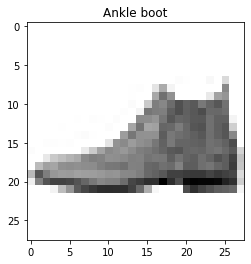

In [12]:
import matplotlib
import matplotlib.pyplot as plt

x, y = test_data[0]

label = training_data.classes[y]

plt.title(label)
plt.imshow(x[0], cmap = matplotlib.cm.binary)

In [13]:
from torch.utils.data import DataLoader

batch_size = 64

# 将数据打包为dataloader
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(X.size())
    print(y.size())
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [15]:
# 建立模型

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        # [64, 1, 28, 28] => [64, 28*28]
        batch_size = x.size(0)
        x = x.view(batch_size, -1)

        # [64, 28*28] => [64, 10]
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
# model.cuda()
if torch.cuda.is_available():
    model.cuda()

model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [17]:
def train(dataloader, model, loss_func, optimizer):
    # 开启训练模式
    model.train()

    size = len(dataloader.dataset)
    for batch_idx, (X, y) in enumerate(dataloader):
        if torch.cuda.is_available():
            X = X.cuda()
            y = y.cuda()

        pred = model(X)
        loss = loss_func(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0:
            current = (batch_idx+1) * X.size(0)
            print(f'loss: {loss.item():.7f}  [{current:5d}/{size:5d}]')

In [19]:
def test(dataloader, model, loss_func):
    # 关闭训练模式
    model.eval()
    test_loss = 0
    correct_num = 0

    with torch.no_grad():
        for X, y in dataloader:
            if torch.cuda.is_available():   
                X = X.cuda()
                y = y.cuda()

            pred = model(X)

            test_loss = test_loss + loss_func(pred, y).item()
            correct_num = correct_num + (pred.argmax(1) == y).float().sum().item()
        test_loss = test_loss / len(dataloader)
        accuracy = correct_num / len(dataloader.dataset)

        print(f'Accuracy: {accuracy:.4f}, Test Loss: {test_loss:.8f}\n')

In [20]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}\n-------------------------')
    train(train_dataloader, model, loss_func, optimizer)
    test(test_dataloader, model, loss_func)
print('Done -)')


Epoch 1
-------------------------
loss: 2.1430862  [ 6400/60000]
loss: 2.1153181  [12800/60000]
loss: 2.0888729  [19200/60000]
loss: 2.0780406  [25600/60000]
loss: 2.0591388  [32000/60000]
loss: 2.0214708  [38400/60000]
loss: 2.0036471  [44800/60000]
loss: 1.9990337  [51200/60000]
loss: 1.8947505  [57600/60000]
Accuracy: 0.5164, Test Loss: 1.89750632

Epoch 2
-------------------------
loss: 1.8563385  [ 6400/60000]
loss: 1.8191421  [12800/60000]
loss: 1.7811962  [19200/60000]
loss: 1.7853355  [25600/60000]
loss: 1.7202821  [32000/60000]
loss: 1.6912156  [38400/60000]
loss: 1.6551976  [44800/60000]
loss: 1.6833435  [51200/60000]
loss: 1.5431420  [57600/60000]
Accuracy: 0.6142, Test Loss: 1.53716122

Epoch 3
-------------------------
loss: 1.4831998  [ 6400/60000]
loss: 1.4739131  [12800/60000]
loss: 1.4208043  [19200/60000]
loss: 1.5086929  [25600/60000]
loss: 1.3713826  [32000/60000]
loss: 1.3803328  [38400/60000]
loss: 1.3655721  [44800/60000]
loss: 1.4315727  [51200/60000]
loss: 1.27

In [21]:
torch.save(model.state_dict(), "data/save_model/model.pth")

In [22]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/save_model/model.pth'))

<All keys matched successfully>

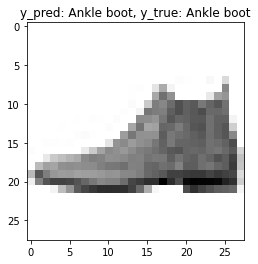

In [23]:
model.eval()
x, y = test_data[0]
pred = model(x)

classes = training_data.classes

predicted = classes[pred[0].argmax(0)]
actual = classes[y]

plt.title(f'y_pred: {predicted}, y_true: {actual}')
plt.imshow(x[0], cmap = matplotlib.cm.binary)